<a href="https://colab.research.google.com/github/hamsika04/6thSem-ML-Lab/blob/main/1BM22CS054_LAB_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv("iris.csv")

# Separate features and labels
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))

# Linear Kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("\nLinear Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))


RBF Kernel SVM Accuracy: 1.0
Confusion Matrix (RBF):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Linear Kernel SVM Accuracy: 1.0
Confusion Matrix (Linear):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Letter Recognition Accuracy: 0.996
Confusion Matrix:
 [[3850    1]
 [  15  134]]


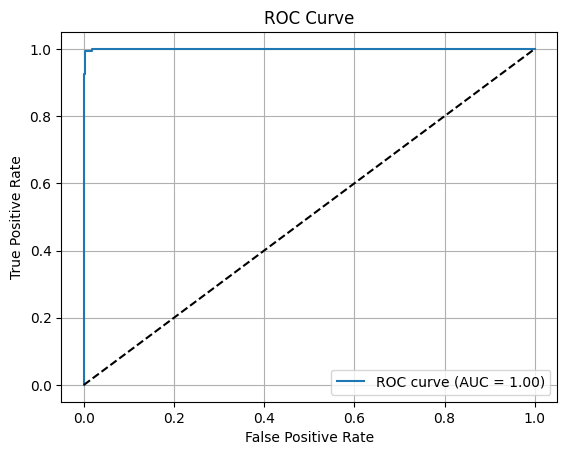

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load dataset
letters = pd.read_csv("letter-recognition.csv")

# Features and target
X = letters.iloc[:, 1:]
y = letters.iloc[:, 0]  # assuming first column is label

# Binary classification for ROC (e.g., A vs not A)
y_binary = (y == 'A').astype(int)  # modify based on actual dataset

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# SVM with RBF kernel and probability=True for ROC
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train_bin)

# Predict
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Accuracy and Confusion matrix
print("Letter Recognition Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
auc_score = roc_auc_score(y_test_bin, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
